## 2.LOAD THE DATASET

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 3.Perform Below visualizations

##Univariate Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.scatter(data.index,data['CustomerId'])
plt.show()

In [ ]:
sns.scatterplot(x=data.index,y=data['CustomerId'],hue=data['Age'])

In [ ]:
plt.hist(data['CreditScore'])

In [ ]:
plt.boxplot(data['CustomerId'])

##BiVariate Analysis

In [ ]:
plt.boxplot(data['CustomerId'])

In [ ]:
data.corr()

##MultiVariate Analysis 

In [ ]:
sns.pairplot(data)

## 4.Perform Descriptive statistics on the dataset 

In [8]:
data.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## 5.HANDLE THE MISSING VALUES 

In [10]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
#No Null values present in this dataset
#incase age,region column has missing values we can us below code:
data['Age'].fillna(data['Age'].mean(),inplace=True)

## 6.FIND THE OUTLIERS AND REPLACE THE OUTLIERS 

In [13]:
import seaborn as sns

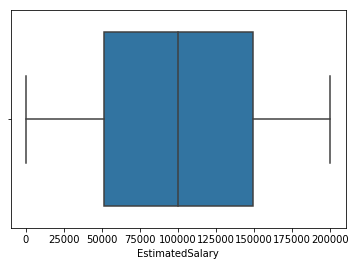

In [14]:
sns.boxplot(data.EstimatedSalary)

In [18]:
##No outlier as found

In [19]:
perc99=data.EstimatedSalary.quantile(0.99)
perc99

198069.7345

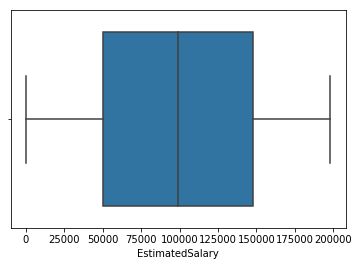

In [21]:
##If outlier is present
data=data[data.EstimatedSalary<=perc99]
sns.boxplot(data.EstimatedSalary)

## 7.CHECK THE CATEGORICAL COLUMN AND PERFORM ENCODING 

In [22]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [26]:
data.Gender=le.fit_transform(data.Gender)

In [29]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [30]:
##drop unwanted columns
data.drop(columns=['Surname','Geography'],inplace=True)

In [31]:
data.head()

,RowNumber,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0


## 8.Split the Data into Dependent and Independent variables 

In [32]:
y=data['EstimatedSalary']

In [33]:
x=data.drop('EstimatedSalary',axis=1)

In [34]:
print(x)

      RowNumber  CustomerId  CreditScore  Gender  Age  Tenure    Balance  \
0             1    15634602          619       0   42       2       0.00   
1             2    15647311          608       0   41       1   83807.86   
2             3    15619304          502       0   42       8  159660.80   
3             4    15701354          699       0   39       1       0.00   
4             5    15737888          850       0   43       2  125510.82   
5             6    15574012          645       1   44       8  113755.78   
6             7    15592531          822       1   50       7       0.00   
7             8    15656148          376       0   29       4  115046.74   
8             9    15792365          501       1   44       4  142051.07   
9            10    15592389          684       1   27       2  134603.88   
10           11    15767821          528       1   31       6  102016.72   
11           12    15737173          497       1   24       3       0.00   
12          

In [35]:
print(y)

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
5       149756.71
6        10062.80
7       119346.88
8        74940.50
9        71725.73
10       80181.12
11       76390.01
12       26260.98
13      190857.79
14       65951.65
15       64327.26
16        5097.67
17       14406.41
18      158684.81
19       54724.03
20      170886.17
21      138555.46
22      118913.53
23        8487.75
24      187616.16
25      124508.29
26      170041.95
27       38433.35
28      100187.43
29       53483.21
          ...    
9970    119377.36
9971    166472.81
9972    171552.02
9973    157474.10
9974     13549.24
9975    196526.55
9976     84419.78
9977     24991.92
9978    191608.97
9979      2988.28
9980     99595.67
9981     53445.17
9982    115146.40
9983    151325.24
9984     51695.41
9985     96833.00
9986     34047.54
9987      1914.41
9988     49337.84
9989    179436.60
9990     53667.08
9991     69384.71
9992    195192.40
9993     29179.52
9994    16

## 9.SCALE THE INDEPENDENT VALUES 

In [37]:
from sklearn.preprocessing import scale
x_scaled=pd.DataFrame(scale(x),columns=x.columns)

In [38]:
print(x_scaled)

      RowNumber  CustomerId  CreditScore    Gender       Age    Tenure  \
0     -1.731530   -0.782480    -0.326129 -1.096562  0.291004 -1.041861   
1     -1.731184   -0.605832    -0.440002 -1.096562  0.195832 -1.387751   
2     -1.730838   -0.995113    -1.537319 -1.096562  0.291004  1.033476   
3     -1.730491    0.145333     0.502035 -1.096562  0.005489 -1.387751   
4     -1.730145    0.653133     2.065194 -1.096562  0.386175 -1.041861   
5     -1.729799   -1.624644    -0.056976  0.911942  0.481347  1.033476   
6     -1.729452   -1.367241     1.775336  0.911942  1.052376  0.687586   
7     -1.729106   -0.483003    -2.841677 -1.096562 -0.946226 -0.350082   
8     -1.728760    1.410330    -1.547671  0.911942  0.481347 -0.350082   
9     -1.728413   -1.369215     0.346754  0.911942 -1.136569 -1.041861   
10    -1.728067    1.069184    -1.268166  0.911942 -0.755883  0.341697   
11    -1.727721    0.643195    -1.589079  0.911942 -1.422084 -0.695972   
12    -1.727375   -0.814976    -1.8064

## 10.SPLIT THE DATA INTO TRAINING AND TESTING 

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=10)

In [42]:
x_train.shape

(7920, 11)

In [44]:
y_train.shape

(7920,)